In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt
import unyt as u

import richio
richio.plots.use_nice_style()

In [3]:
!ls /home/hey4/rich_tde/data/raw/N1e6TDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter

counter.txt   snap_26.pvtu  snap_46	  snap_65.h5	    snap_full_100.pvtu
gravity.txt   snap_27	    snap_46.h5	  snap_65.pvtu	    snap_full_101
restart       snap_27.h5    snap_46.pvtu  snap_66	    snap_full_101.h5
restart.h5    snap_27.pvtu  snap_47	  snap_66.h5	    snap_full_101.pvtu
restart.pvtu  snap_28	    snap_47.h5	  snap_66.pvtu	    snap_full_102
snap_0	      snap_28.h5    snap_47.pvtu  snap_67	    snap_full_102.h5
snap_0.h5     snap_28.pvtu  snap_48	  snap_67.h5	    snap_full_102.pvtu
snap_0.pvtu   snap_29	    snap_48.h5	  snap_67.pvtu	    snap_full_103
snap_1	      snap_29.h5    snap_48.pvtu  snap_68	    snap_full_103.h5
snap_1.h5     snap_29.pvtu  snap_49	  snap_68.h5	    snap_full_103.pvtu
snap_1.pvtu   snap_3	    snap_49.h5	  snap_68.pvtu	    snap_full_83
snap_10       snap_3.h5     snap_49.pvtu  snap_69	    snap_full_83.h5
snap_10.h5    snap_3.pvtu   snap_5	  snap_69.h5	    snap_full_83.pvtu
snap_10.pvtu  snap_30	    snap_5.h5	  snap_69.pvtu	    snap_full_84
snap_11       s

In [4]:
output = '/home/hey4/rich_tde/data/raw/N1e6TDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter/snap_full_103.h5'
# output = '/home/hey4/rich_tde/data/raw/BaseTDEComptonGrayMPIR1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenterUltraLowRes/snap_11.h5'

snap = richio.load(output)

/zfsstore/user/hey4/rich_tde/richio/data.py:55: UserWarning: No snapshot number found in path: /home/hey4/rich_tde/data/raw/N1e6TDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter/snap_full_103.h5
  warnings.warn(f"No snapshot number found in path: {self.path}")


In [5]:
snap.rank

96

In [6]:
snap.time, len(snap)

(unyt_array([13.30857531], 'code_time'), 2153999)

In [7]:
snap.info()

                                     RICH SNAPSHOT INFORMATION                                      

Snapshot Details                        
----------------------------------------------------------------------------------------------------
  Path                      : /home/hey4/rich_tde/data/raw/N1e6TDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter/snap_full_103.h5
  Snapshot Number           : -1
  Time                      : [13.30857531] code_time
  Box size                  : [-630.12725842 -756.15235425 -428.4227975   369.19153521  422.79930463
  473.85239706] code_length
  Cycle                     : [12246.] dimensionless
  Number of Cells           : 2,153,999
  Number of Ranks           : 96

Available Fields                         [Unit System: RICH]
----------------------------------------------------------------------------------------------------
Field           Unit                                     Aliases
--------------------------------------------------

/zfsstore/user/hey4/rich_tde/richio/units.py:116: UserWarning: 'Eg_0' is in the data output but not used in the simulation.
  warnings.warn(f"'{key}' is in the data output but not used in the simulation.")
/zfsstore/user/hey4/rich_tde/richio/units.py:116: UserWarning: 'tracers/WasRemoved' is in the data output but not used in the simulation.
  warnings.warn(f"'{key}' is in the data output but not used in the simulation.")


Box             code_length                              box_size, box, boxsize
CMx             code_length                              cm_x, center_of_mass_x
CMy             code_length                              cm_y, center_of_mass_y
CMz             code_length                              cm_z, center_of_mass_z
Cycle           dimensionless                            cycle, step, iteration
Density         code_mass/code_length**3                 density, densitites, Den, rho
Dissipation     code_mass/(code_length*code_time**3)     dissipation, Diss, dissipation_rate
DpDx            code_mass/(code_length**2*code_time**2)  pressure_gradient_x, grad_p_x, dp_dx
DpDy            code_mass/(code_length**2*code_time**2)  pressure_gradient_y, grad_p_y, dp_dy
DpDz            code_mass/(code_length**2*code_time**2)  pressure_gradient_z, grad_p_z, dp_dz
DrhoDx          code_mass/code_length**4                 density_gradient_x, grad_rho_x, drho_dx
DrhoDy          code_mass/code_length**4 

In [8]:
snap.time.in_units('day')

unyt_array([0.2469172], 'day')

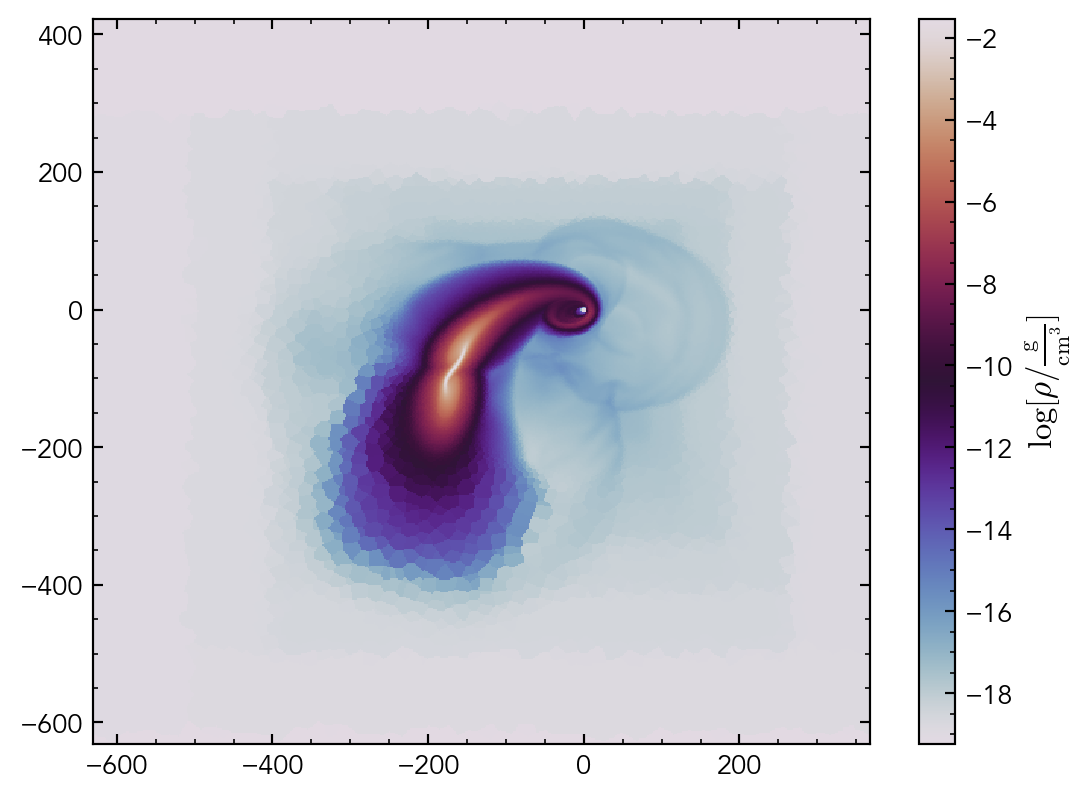

In [9]:
ax, im, sliced = snap.plots.peek()

In [10]:
len(snap)

2153999

## Compare to the existing runs

In [11]:
!ls /data1/projects/pi-rossiem/TDE_data/
# R0.47M0.5BH10000beta1S60n1.5ComptonLowResNewAMR

DLscript.slurm
KonstR0.47M0.5BH10000beta1S60n1.5Compton
R0.47M0.5BH100000beta1S60ComptonNew
R0.47M0.5BH100000beta1S60ComptonOld
R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR
R0.47M0.5BH10000beta1S60n1.5ComptonLowResNewAMR
R0.47M0.5BH10000beta1S60n1.5ComptonNewAMR
R0.47M0.5BH1e+06beta1S60ComptonNew
R0.47M0.5BH1e+06beta1S60ComptonOld
StreamConvergence
cr_fold.out
deleter.slurm
mover.slurm
opacity_tests
rem.out


In [12]:
output = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonLowResNewAMR/snap_97'
# output = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonNewAMR/snap_381'
# output = '/data1/projects/pi-rossiem/TDE_data/KonstR0.47M0.5BH10000beta1S60n1.5Compton/snap_80'
snap = richio.load(output)

In [13]:
snap.time

unyt_quantity(0.24411655, 'day')

In [14]:
len(snap)

1247677

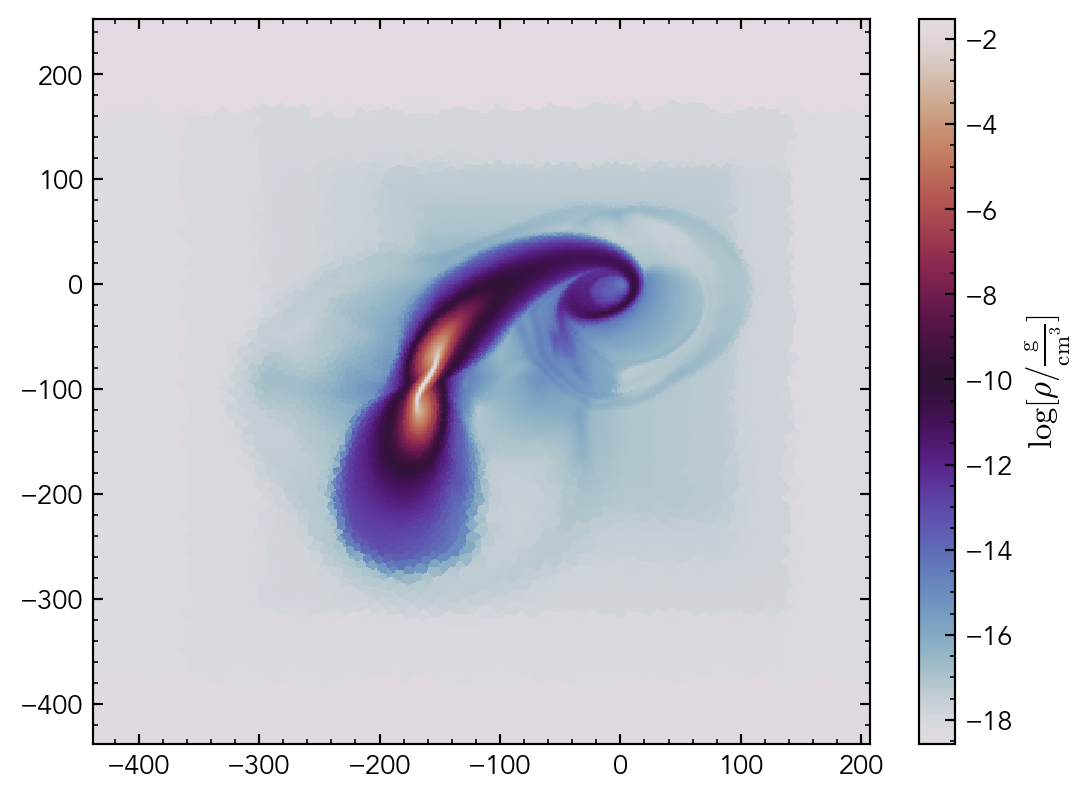

In [15]:
ax, im, sliced = snap.plots.peek()